<a href="https://colab.research.google.com/github/Skander28/Models/blob/main/bilstm_SA(oversampling%2Blemmatisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
!ls /content/drive/MyDrive/

'carte visite badra.gdoc'
 Classroom
'Colab Notebooks'
 django
 entreprise-1-20220417T102515Z-001.zip
'Espace citoyen.pdf'
 ez-learning
 maghrebi
'model (1).pth'
 preprocessed_tweets.csv
 pre_tweets.csv
 Projet_Java_FediBoussaada_LaribiSkander_2A
 Projet_Microservices
 trainer2.pth
'Untitled presentation.gslides'


In [85]:
import pandas as pd
tweets_ids = pd.read_csv('/content/drive/MyDrive/maghrebi/dialect_dataset.csv')

In [86]:
# Read the given dataset which contain the Ids and the labels
df_clean = pd.read_csv('/content/drive/MyDrive/maghrebi/messages.csv',
                 lineterminator='\n')

column_names = ['id', 'tweets']  # list of column names

df_clean.columns = column_names
df_clean.head()

,id,tweets
0,1.175358e+18,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1.175416e+18,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1.175450e+18,@KanaanRema مبين من كلامه خليجي
3,1.175471e+18,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1.175497e+18,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [87]:
tweets_dataset = pd.merge(tweets_ids, df_clean, on='id', how='inner')
tweets_dataset.head()

,id,dialect,tweets
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [88]:
filtered_df = tweets_dataset[tweets_dataset['dialect'].isin(['TN','DZ','MA','LY'])]
filtered_df.head()

,id,dialect,tweets
15497,1009754958479151232,LY,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
15498,1009794751548313600,LY,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
15499,1019989115490787200,LY,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
15500,1035479791758135168,LY,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
15501,1035481122921164800,LY,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...


In [89]:
import nltk 
from nltk.corpus import stopwords

In [90]:
nltk.download('stopwords')
stop=stopwords.words('arabic')

filtered_df['tweets'] = filtered_df['tweets'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
filtered_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-90-392fa63477a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tweets'] = filtered_df['tweets'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))


,id,dialect,tweets
15497,1009754958479151232,LY,@toha_Altomy @gy_yah قليلين ادب ومنافقين. اخته...
15498,1009794751548313600,LY,@AlmFaisal 😂😂 الليبيين متقلبين!!! بالنسبة ليا ...
15499,1019989115490787200,LY,@smsm071990 @ALMOGRBE 20 تانيه شاب ليبي بيرتاح...
15500,1035479791758135168,LY,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
15501,1035481122921164800,LY,@lyranoo85 شكلك متعقدة علشان الراجل تحبيه ازوج...


In [91]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
filtered_df['tweets'] = filtered_df['tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-91-99d7a08d6300>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tweets'] = filtered_df['tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in x.split()]))


In [92]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(filtered_df.drop('dialect', axis=1), filtered_df['dialect'])
filtered_df = pd.concat([X_resampled, y_resampled], axis=1)

In [93]:
# Load data
features = filtered_df.tweets.values
labels = pd.get_dummies(filtered_df['dialect']).values

In [94]:
vocab_size = 20000
max_length= 200
tokenizer = Tokenizer(num_words=vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=False)
tokenizer.fit_on_texts(features)
X = tokenizer.texts_to_sequences(features)

In [95]:
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

# use the stopwords
stop_words = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
all_words = []
for tokens in X:
    all_words.extend(tokens)

stop_words = set(stopwords.words('arabic'))
all_words = [word for word in all_words if word not in stop_words]

word_counts = Counter(all_words)
most_common_words = [word for word, count in word_counts.most_common(500)]

def remove_common_words(tokens):
  new_tokens = [token for token in tokens if token not in most_common_words]
  return new_tokens
X = remove_common_words(X)
X = pad_sequences(X, maxlen=max_length)

In [97]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [98]:
# Convert data to PyTorch tensors
X_train_, y_train_ = torch.tensor(X_train), torch.tensor(y_train)
X_val, y_val = torch.tensor(X_val), torch.tensor(y_val)
X_test, y_test = torch.tensor(X_test), torch.tensor(y_test)

In [99]:
class DialectDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [100]:
# Create dataloaders for training, validation, and test sets
train_dataset = DialectDataset(X_train_, y_train_ )
val_dataset = DialectDataset(X_val, y_val)
test_dataset = DialectDataset(X_test, y_test)

In [101]:
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np

vocab_size = 20000
embedding_dim = 100
hidden_dim = 128
output_dim = 4
num_layers = 2
bidirectional = True
lr = 0.01
batch_size = 64
num_epochs = 10

class BiLSTMAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers):
        super(BiLSTMAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=0.5, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(0.5)
        self.attention = SelfAttention(hidden_dim * 2)
        
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)
        attention_out, attention_weights = self.attention(lstm_out)
        fc_out = self.fc(attention_out)
        return fc_out, attention_weights

class SelfAttention(nn.Module):
    def __init__(self, hidden_dim):
        super(SelfAttention, self).__init__()
        self.projection = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )
        
    def forward(self, encoder_outputs):
        energy = self.projection(encoder_outputs)
        weights = F.softmax(energy.squeeze(-1), dim=1)
        outputs = (encoder_outputs * weights.unsqueeze(-1)).sum(dim=1)
        return outputs, weights

In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.BCEWithLogitsLoss()

for epoch in tqdm(range(num_epochs)):
     model.train()
     running_loss = 0.0
     with torch.cuda.device(0):
       for batch in train_dataloader:
         inputs, labels = batch[0].to(device), batch[1].to(device)
         optimizer.zero_grad()
         labels = labels.float()
         outputs, _ = model(inputs)
         loss = criterion(outputs, labels)
         loss.backward()
         optimizer.step()
         running_loss += loss.item()
         preds = torch.sigmoid(outputs) > 0.5
         acc = accuracy_score(labels.cpu().detach().numpy(), preds.cpu().detach().numpy())
         #print('Train Accuracy: {:.4f}'.format(acc))
     epoch_loss = running_loss / (len(train_dataloader))

     val_loss = 0.0
     model.eval()
     with torch.no_grad():
         for batch in val_dataloader:
             inputs, labels = batch[0].to(device), batch[1].to(device)
             labels = labels.float()
             outputs, _= model(inputs)
             loss = criterion(outputs, labels)
             val_loss += loss.item()
             #val_preds = torch.sigmoid(outputs) > 0.5
             #val_acc = accuracy_score(labels.cpu().detach().numpy(), val_preds.cpu().detach().numpy())
             #print('Val Accuracy: {:.4f}'.format(val_acc))
     val_loss = val_loss / (len(val_dataloader))
     
     print(" epoch loss :", epoch_loss , "| val loss :", val_loss)
     #print('Train Accuracy: {:.4f}'.format(acc))
     #print('Val Accuracy: {:.4f}'.format(val_acc))

print("Training stopped after epoch", epoch)
        

 10%|█         | 1/10 [00:59<08:51, 59.10s/it]

 epoch loss : 0.24614191560872964 | val loss : 0.13877790656338618


 20%|██        | 2/10 [01:58<07:54, 59.29s/it]

 epoch loss : 0.1133856796568816 | val loss : 0.1217925417987467


 30%|███       | 3/10 [02:58<06:56, 59.49s/it]

 epoch loss : 0.09198627425801187 | val loss : 0.12003275871421527


 40%|████      | 4/10 [03:57<05:56, 59.37s/it]

 epoch loss : 0.08775186164151409 | val loss : 0.11622095231002974


 50%|█████     | 5/10 [04:56<04:56, 59.30s/it]

 epoch loss : 0.07947247191705213 | val loss : 0.124032119171495


 60%|██████    | 6/10 [05:55<03:57, 59.29s/it]

 epoch loss : 0.08024787366741994 | val loss : 0.12944020311013588


 70%|███████   | 7/10 [06:56<02:58, 59.65s/it]

 epoch loss : 0.07746873683552156 | val loss : 0.12278311543202805


 80%|████████  | 8/10 [07:55<01:59, 59.56s/it]

 epoch loss : 0.0798455369351351 | val loss : 0.1306780785123266


 90%|█████████ | 9/10 [08:55<00:59, 59.51s/it]

 epoch loss : 0.08112808818590235 | val loss : 0.13348489109137393


100%|██████████| 10/10 [09:54<00:00, 59.42s/it]

 epoch loss : 0.08379676483760011 | val loss : 0.13338120003203743
Training stopped after epoch 9


In [115]:
filtered_df['dialect'].value_counts()

LY    36499
TN    36499
MA    36499
DZ    36499
Name: dialect, dtype: int64

Test Accuracy: 0.8851
Test f1 score: 0.9033
Test precision: 0.9187
Test recall: 0.8887


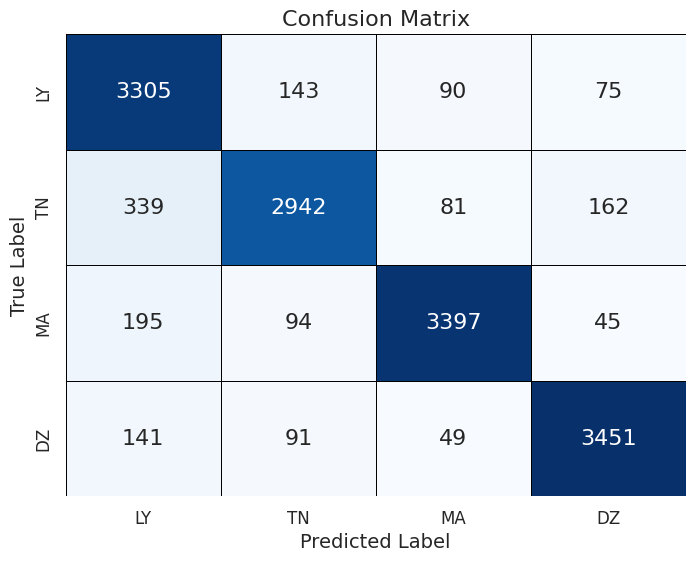

In [117]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for batch in test_dataloader:
        inputs, labels = batch[0].to(device), batch[1].to(device)
        labels = labels.float()
        outputs, _ = model(inputs)
        preds = torch.sigmoid(outputs) > 0.5
        y_true.extend(labels.cpu().detach().numpy())
        y_pred.extend(preds.cpu().detach().numpy())


test_acc = accuracy_score(y_true, y_pred)
test_f1 = f1_score(y_true, y_pred, average='macro')
test_pres = precision_score(y_true, y_pred, average='macro')
test_recall = recall_score(y_true, y_pred, average='macro')
y_true = np.argmax(y_true, axis=1)  # Convert to multiclass format
y_pred = np.argmax(y_pred, axis=1)  # Convert to multiclass format
test_confusion_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
print('Test Accuracy: {:.4f}'.format(test_acc))
print('Test f1 score: {:.4f}'.format(test_f1))
print('Test precision: {:.4f}'.format(test_pres))
print('Test recall: {:.4f}'.format(test_recall))
# Create confusion matrix plot
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=0.5, linecolor='black', ax=ax)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_xticklabels(['LY', 'TN', 'MA', 'DZ'], fontsize=12)
ax.set_yticklabels(['LY', 'TN', 'MA', 'DZ'], fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [118]:
# Set the model to evaluation mode
model.eval()
device = "cuda"
# Tokenize the new complaint and pad the sequence
#new_complaint = ['واش دير للعشى']
#new_complaint  = ["شوكران علا هاد "]
#new_complaint  = ["نبي نروح للحوش"]
new_complaint  = ["فرحان و نتشرف الي انا من اقلية الشعب الي عمري ما صدقت كذبة الثورة و الديمقراطية و ما عداها عليا حتى سياسي ملي حكمو من 2011 و ما تحكموش في تفكيري باجات فيسبوك و اعلاميين مرتزقة و سبر اراء غالط"]
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_length)

# Convert the padded sequence to a PyTorch tensor and move it to the device (e.g., GPU) if available
padded_tensor = torch.LongTensor(padded).to(device)

# Compute the model's prediction for the padded sequence
with torch.no_grad():
    pred = model(padded_tensor)

# Move the prediction back to the CPU and convert to a numpy array
#pred = pred.cpu().numpy()

# Map the prediction to a class label using the CLASS_DICT{'DZ': 0, 'LY': 1, 'MA': 2, 'TN': 3}
CLASS_DICT = {0: "DZ",1: "LY", 2: "MA",3: "TN"}
class_label = CLASS_DICT[np.argmax(pred[0].cpu().numpy(), axis=1)[0]]

# Print the prediction and the predicted class label
print(class_label)

TN


In [106]:
torch.save(model.state_dict(), 'model3.pth')